In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
file = pd.read_csv("/content/bengaluru_house_prices (1).csv")
file

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [49]:
file.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [50]:
file["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [51]:
file.value_counts()

area_type             availability   location                        size   society  total_sqft   bath  balcony  price 
Super built-up  Area  Ready To Move  Haralur Road                    2 BHK  RInceeg  1243         2.0   2.0      46.00     10
                                     HSR Layout                      2 BHK  NRosete  1140         2.0   2.0      46.00      9
                                     Parappana Agrahara              2 BHK  Peide L  1194         2.0   2.0      47.00      7
                      21-Dec         Kanakpura Road                  3 BHK  PrarePa  1100         3.0   2.0      53.00      5
                      Ready To Move  Raja Rajeshwari Nagar           2 BHK  GrrvaGr  1196         2.0   2.0      40.54      5
                                                                                                                           ..
                      19-Dec          Bhoganhalli                    1 RK   Rosha I  296          1.0   0.0      22.89      1
                      19-Aug         Yelahanka                       2 BHK  SMllay   1180 - 1630  2.0   0.0      50.58      1
                                     Kengeri                         1 BHK  VBn 2lm  540          1.0   1.0      22.50      1
                                                                                     416          1.0   1.0      19.50      1
                      Ready To Move  Yeshwanthpur Industrial Suburb  2 BHK  Essic C  1415         2.0   2.0      120.00     1
Name: count, Length: 7144, dtype: int64

In [52]:
file.shape

(13320, 9)

In [53]:
file = file.drop(['area_type','society','balcony','availability'],axis='columns')
file

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [54]:
file.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [55]:
file.shape

(13320, 5)

In [56]:
file.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [57]:
file = file.dropna()

In [58]:
file.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [59]:
file["bhk"] = file["size"].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-59-9263496332f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file["bhk"] = file["size"].apply(lambda x: int(x.split(" ")[0]))


In [60]:
file.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [61]:
import pandas as pd

def convert_sqft_to_num(x):
    # Check if x is already a float or an integer.
    if isinstance(x, (float, int)):
        return x  # If it is, return it as is.
    # If x is not a number, convert it to a string and then split it.
    if isinstance(x, str):
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1]))/2
        try:
            return float(x)
        except ValueError:
            return None
    return None # return None if it is not float, int or string

file["total_sqft"] = file["total_sqft"].apply(convert_sqft_to_num) # Apply the function to the 'total_sqft' column
file = file.dropna() # Drop rows with None values after conversion
file["price_per_sqft"] = file["price"]*100000/file["total_sqft"] # Recalculate 'price_per_sqft'

<ipython-input-61-aa2246630e30>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file["total_sqft"] = file["total_sqft"].apply(convert_sqft_to_num) # Apply the function to the 'total_sqft' column
<ipython-input-61-aa2246630e30>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file["price_per_sqft"] = file["price"]*100000/file["total_sqft"] # Recalculate 'price_per_sqft'


In [62]:
file.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [63]:
# prompt: i want to add columns priceer square feet

file['price_per_sqft'] = file['price']*100000/file['total_sqft']

In [64]:
file.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [65]:
file["location"] = file["location"].apply(lambda x: x.strip())
location_stats = file.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,533
Sarjapur Road,392
Electronic City,304
Kanakpura Road,264
Thanisandra,235
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [66]:
len(location_stats[location_stats<=10])

1047

In [67]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Sadashiva Nagar,10
Naganathapura,10
Basapura,10
Nagadevanahalli,10
Kalkere,10
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [68]:
file.location = file.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(file.location.unique())

241

In [69]:
file[file.total_sqft/file.bhk<300].head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [70]:
file.shape

(13200, 7)

In [71]:
file2 = file[~(file.total_sqft/file.bhk<300)]
file2.shape

(12456, 7)

In [72]:
file2.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [73]:
def remove_outlier(file2):
  df_out = pd.DataFrame()
  for key, value in file2.groupby('location'):
    meam = np.mean(value.price_per_sqft)
    std = np.std(value.price_per_sqft)
    reduced_df = value[(value.price_per_sqft>(meam-std)) & (value.price_per_sqft<=(meam+std))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
file3 = remove_outlier(file2)
file3.shape




(10242, 7)

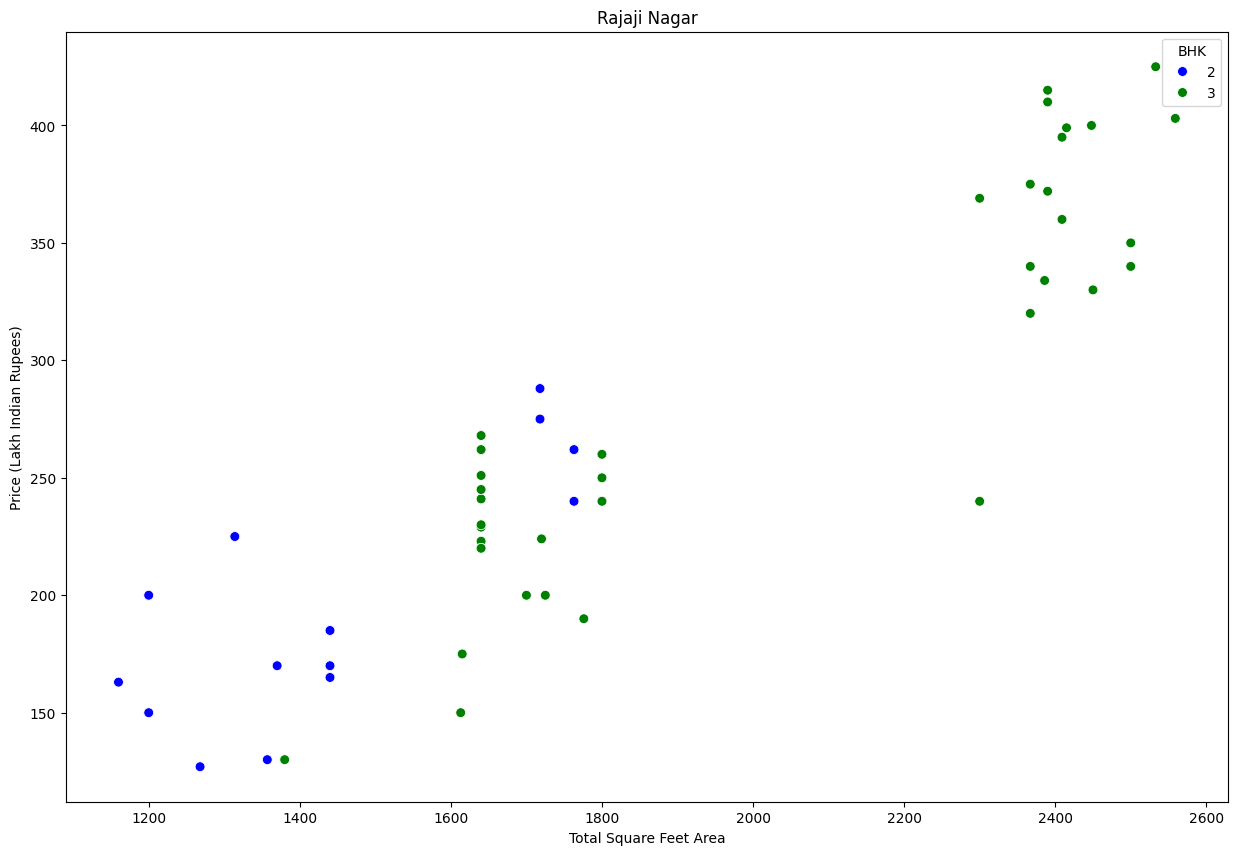

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame correctly
filtered = file3[(file3.location == "Rajaji Nagar") & (file3.bhk.isin([2, 3]))]

# Create the scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=filtered,
    x="total_sqft",
    y="price",
    hue="bhk",  # Specify the hue for BHK
    palette={2: "blue", 3: "green"},  # Customize colors for 2 BHK and 3 BHK
    s=50  # Marker size
)

# Add labels and title
plt.xlabel("Total Square Feet Area")
plt.ylabel("Price (Lakh Indian Rupees)")
plt.title("Rajaji Nagar")
plt.legend(title="BHK")
plt.show()


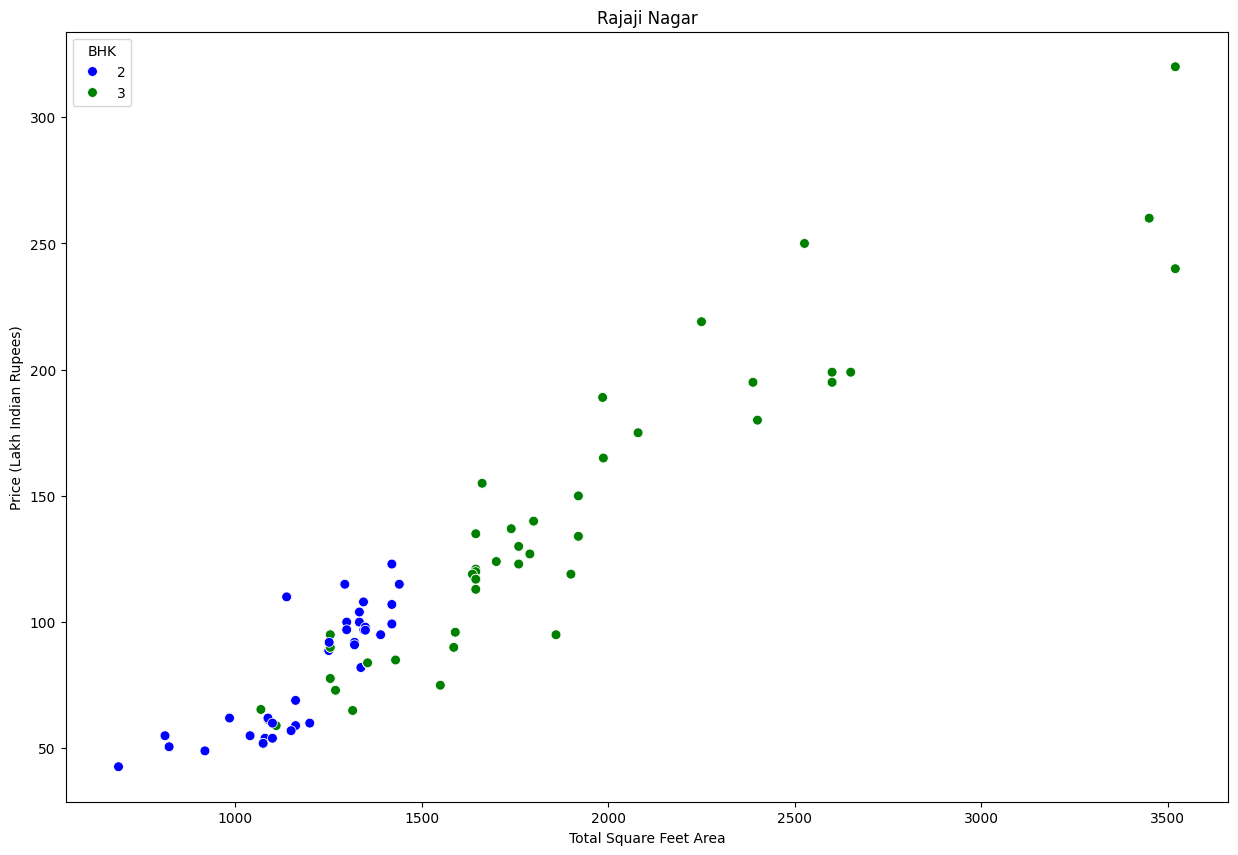

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame correctly
filtered = file3[(file3.location == "Hebbal") & (file3.bhk.isin([2, 3]))]

# Create the scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=filtered,
    x="total_sqft",
    y="price",
    hue="bhk",  # Specify the hue for BHK
    palette={2: "blue", 3: "green"},  # Customize colors for 2 BHK and 3 BHK
    s=50  # Marker size
)

# Add labels and title
plt.xlabel("Total Square Feet Area")
plt.ylabel("Price (Lakh Indian Rupees)")
plt.title("Rajaji Nagar")
plt.legend(title="BHK")
plt.show()


In [76]:
def remove_bhk_outliers(file3):
    exclude_indices = np.array([])
    for location, location_df in file3.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return file3.drop(exclude_indices,axis='index')
file4 = remove_bhk_outliers(file3)
# df8 = df7.copy()
file4.shape

(7317, 7)

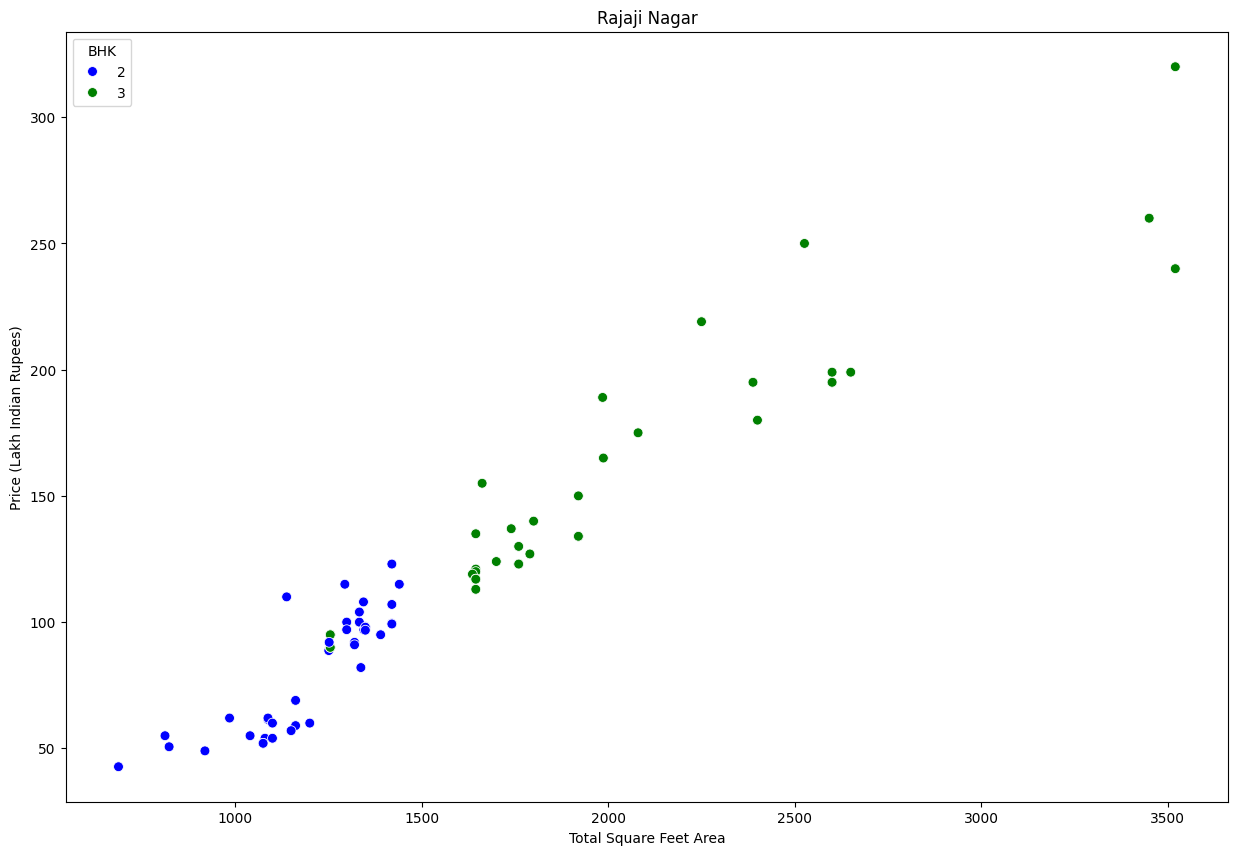

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame correctly
filtered = file4[(file4.location == "Hebbal") & (file4.bhk.isin([2, 3]))]

# Create the scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=filtered,
    x="total_sqft",
    y="price",
    hue="bhk",  # Specify the hue for BHK
    palette={2: "blue", 3: "green"},  # Customize colors for 2 BHK and 3 BHK
    s=50  # Marker size
)

# Add labels and title
plt.xlabel("Total Square Feet Area")
plt.ylabel("Price (Lakh Indian Rupees)")
plt.title("Rajaji Nagar")
plt.legend(title="BHK")
plt.show()


In [78]:
file4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [79]:
file5 = file4[file4.bath<file4.bhk+2]
file5.shape


(7239, 7)

In [80]:
file6 = file5.drop(['size','price_per_sqft'],axis='columns')
file6.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [81]:
# file6.location = file6.location.astype(int)
# encoding = pd.get_dummies(file6.location)
# encoding.head()


dummies = pd.get_dummies(file6.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
file7 = pd.concat([file6, dummies.drop("other", axis = 1)], axis = 1)
file7.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
file7.drop("location", axis = 1)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,70.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10234,1800.0,1.0,200.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,1353.0,2.0,110.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10238,812.0,1.0,26.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [84]:
file7.shape

(7239, 245)

In [85]:
X = file7.drop("price", axis = 1)
X.head()

,location,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
y = file7["price"]
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


In [87]:
len(y)


7239

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [89]:
X_train = X_train.drop("location", axis=1)
X_test = X_test.drop("location", axis=1)

In [90]:
y_train

,price
9243,450.0
8420,160.0
6344,90.0
3317,69.0
229,80.0
...,...
1424,60.0
4293,110.0
1623,40.0
5720,215.0


In [91]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)





0.8629132245229446

In [92]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
  pickle.dump(reg,f)

In [94]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))